In [28]:
#install fastai libraries

!pip install -Uqq fastcore
!pip install -Uqq fastai

In [29]:
!pip install -Uqq seaborn

In [93]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from glob import glob
from colorama import Fore, Style

from fastcore.all import *
from fastai.vision.all import *

In [45]:
import warnings
warnings.filterwarnings('ignore') 

In [6]:
import os
print(os.getcwd())

/home/maureen/Code/personal-repos/projects/computer vision/plant disease


In [23]:
data_dir = '/home/maureen/Code/personal-repos/projects/computer vision/plant disease/data'

In [24]:
path = Path(data_dir)

In [40]:
cnt = 0
plant_names = []
tot_images = 0

contents = [p.name for p in path.ls()]
print(Fore.GREEN)
print("Total number of classes are: ", len(contents))

for i in contents:
    cnt += 1
    plant_names.append(i)

    image_path = os.listdir(data_dir + "/" + i)
    print("\nThe Number of Images in " +i+ ":", len(image_path), end= " ")
    tot_images += len(image_path)


print("\nTotal Number of Images in Directory: ", tot_images)


Total number of classes are:  88

The Number of Images in Grape__leaf_blight_(isariopsis_leaf_spot): 889 
The Number of Images in Lemon__diseased: 77 
The Number of Images in Sugarcane__bacterial_blight: 100 
The Number of Images in Sugarcane__rust: 93 
The Number of Images in Chili__leaf spot: 100 
The Number of Images in Cassava__healthy: 677 
The Number of Images in Chili__yellowish: 100 
The Number of Images in Corn__gray_leaf_spot: 1094 
The Number of Images in Tomato__yellow_leaf_curl_virus: 3214 
The Number of Images in Corn__healthy: 1162 
The Number of Images in Corn__northern_leaf_blight: 1223 
The Number of Images in Tea__bird_eye_spot: 300 
The Number of Images in Cucumber__healthy: 341 
The Number of Images in Potato__early_blight: 1096 
The Number of Images in Wheat__healthy: 1225 
The Number of Images in Grape__healthy: 470 
The Number of Images in Tomato__bacterial_spot: 2136 
The Number of Images in Soybean__mosaic_virus: 22 
The Number of Images in Rice__neck_blast: 

In [72]:
# Get a list of all directories in the specified path
cls_name = [d for d in os.listdir(dir_path) if os.path.isdir(os.path.join(dir_path, d))]

# Initialize an empty list to store dictionaries
data = []

# Loop through each class directory
for cls in cls_name:
    # Extract the class name from the directory name
    cls_split = cls.split('__')
    
    # Add class, disease, and image count information to the list
    data.append({'Plant': cls_split[0], 
                 'Disease': cls_split[1], 
                 'Count': len(os.listdir(os.path.join(dir_path, cls)))})

# Create a DataFrame from the list of dictionaries
cls_df = pd.DataFrame(data)

In [73]:
# Display the DataFrame
cls_df.head(44)

,Plant,Disease,Count
0,Grape,leaf_blight_(isariopsis_leaf_spot),889
1,Lemon,diseased,77
2,Sugarcane,bacterial_blight,100
3,Sugarcane,rust,93
4,Chili,leaf spot,100
5,Cassava,healthy,677
6,Chili,yellowish,100
7,Corn,gray_leaf_spot,1094
8,Tomato,yellow_leaf_curl_virus,3214
9,Corn,healthy,1162


In [71]:
cls_df.tail(44)

,Plant,Disease,Count
44,Sugarcane,red_rot,174
45,Tomato,late_blight,1919
46,Pepper_bell,bacterial_spot,1067
47,Lemon,healthy,159
48,Chili,healthy,100
49,Wheat,yellow_rust,1132
50,Coffee,healthy,439
51,Tomato,spider_mites_(two_spotted_spider_mite),1676
52,Tomato,target_spot,1404
53,Rice,hispa,565


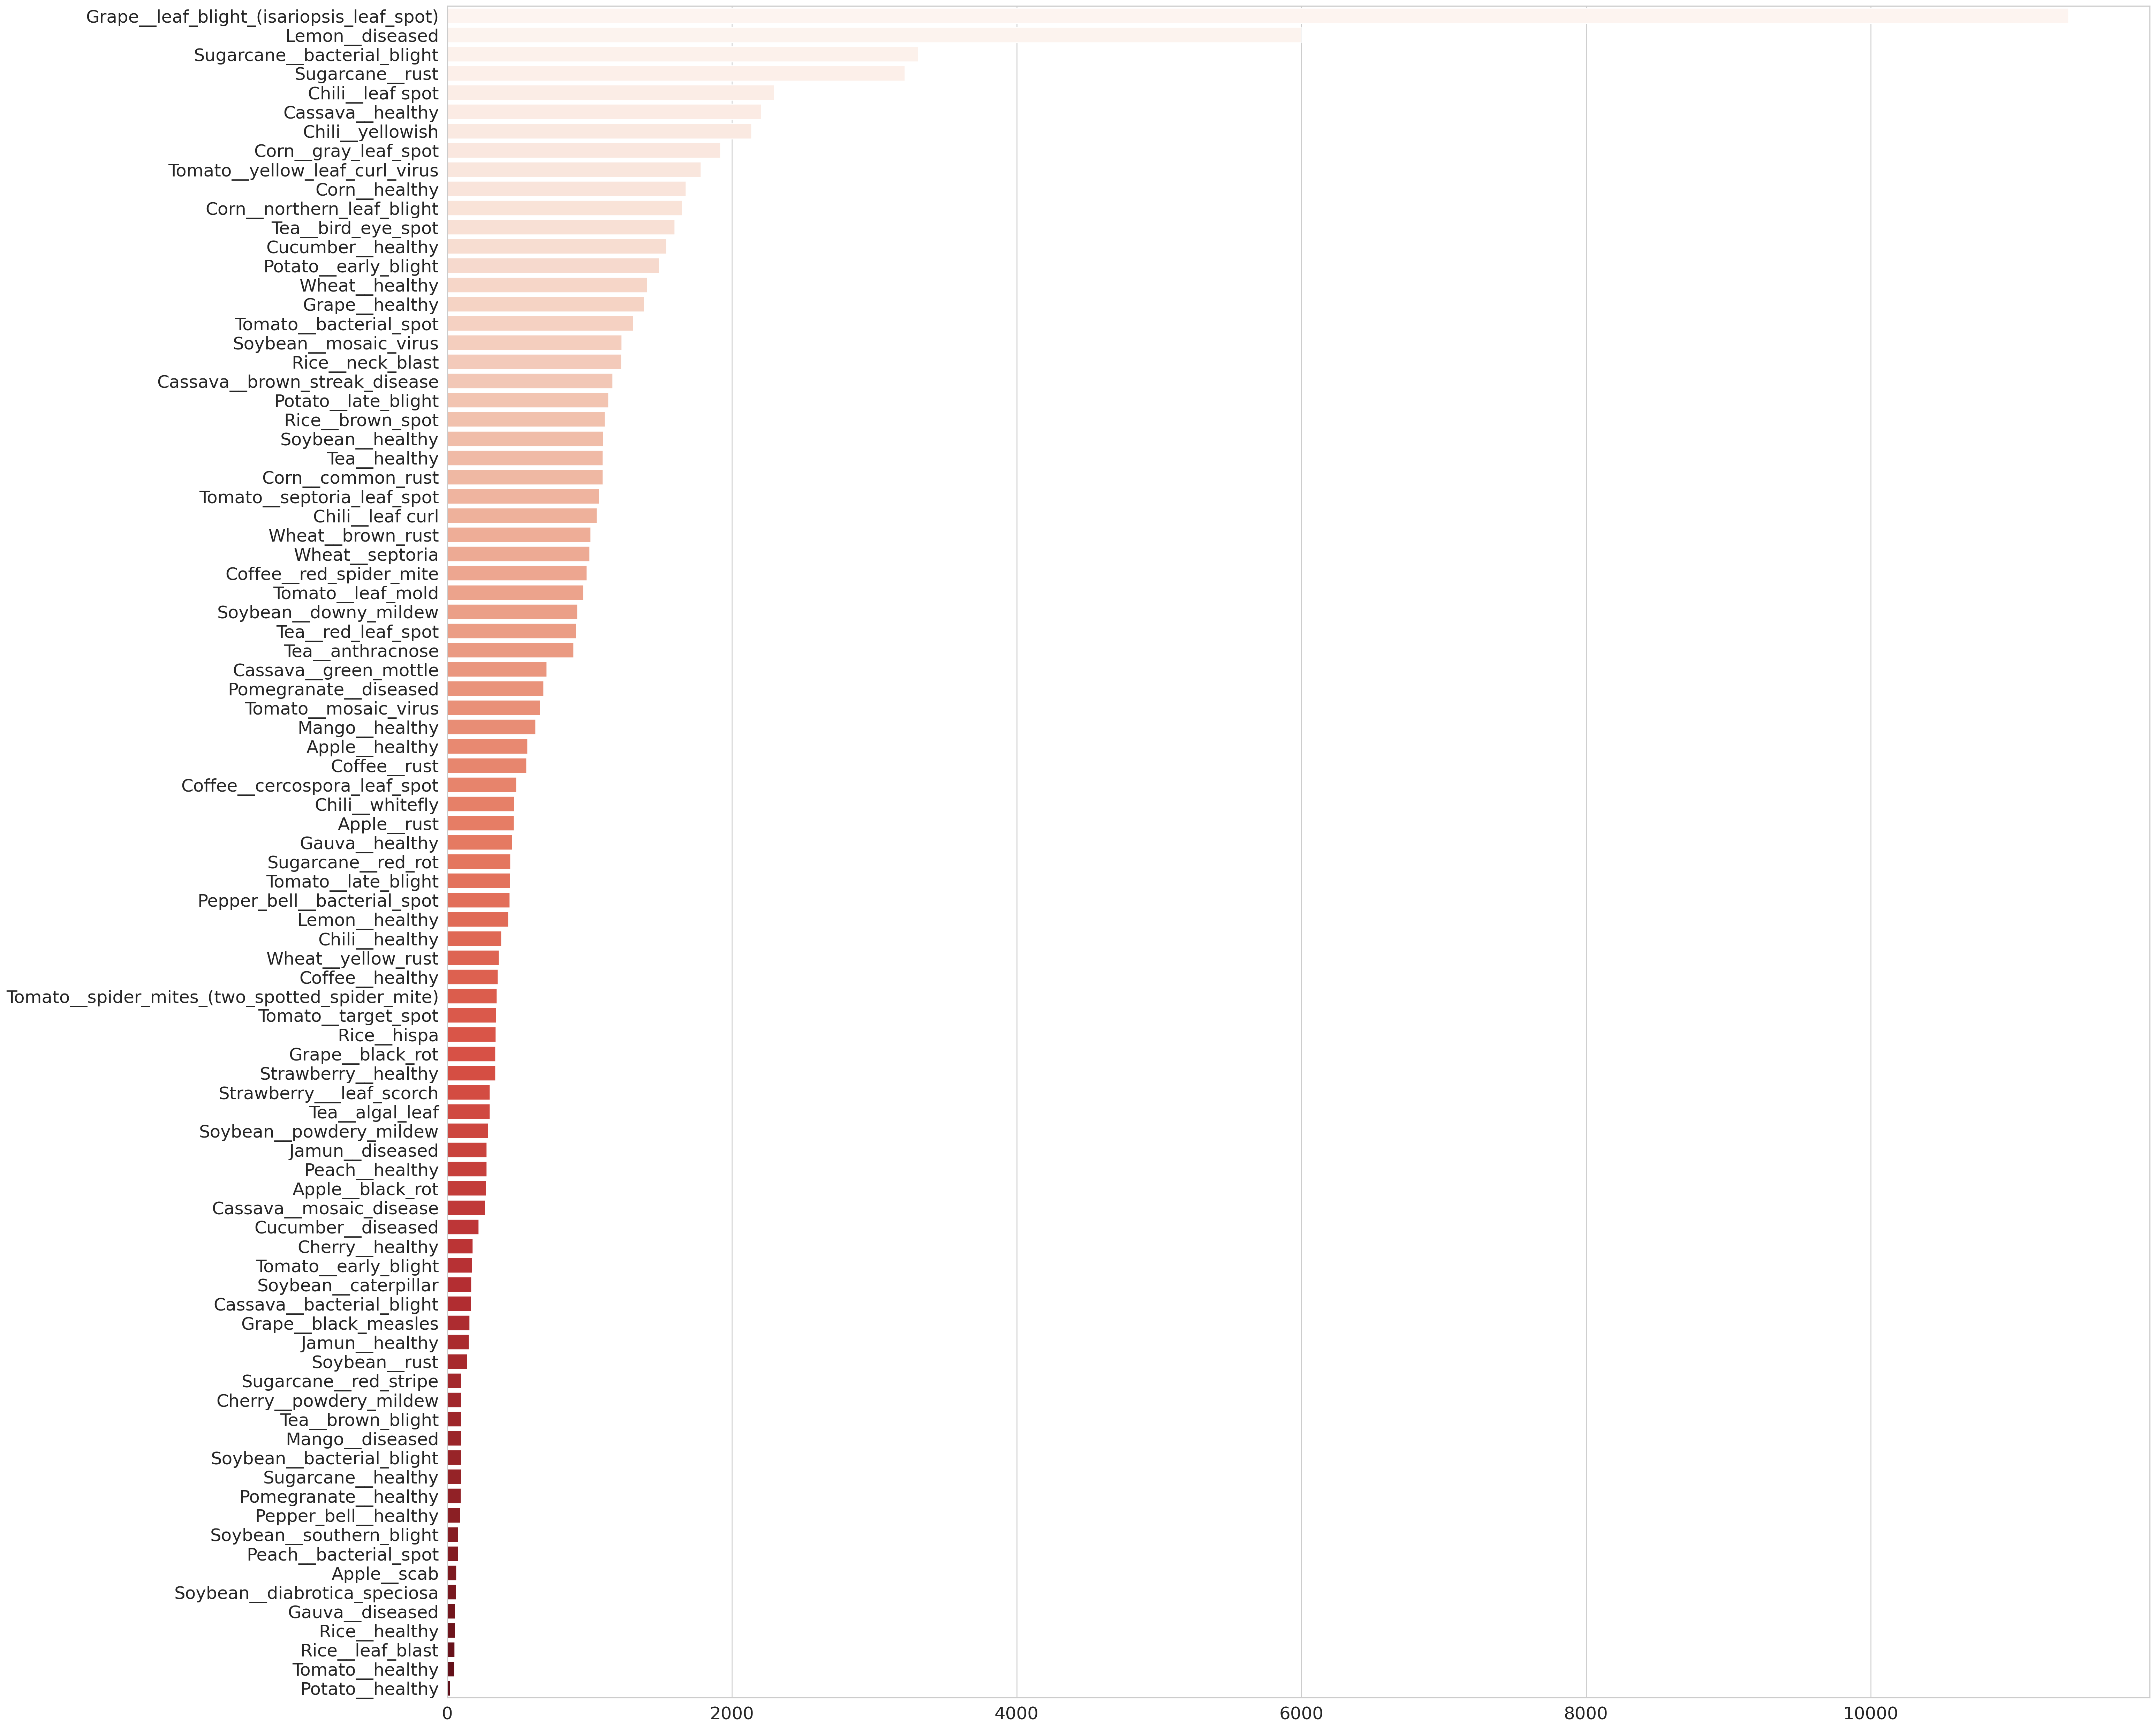

In [74]:
plant_names = []
Len = []
for i in contents:
    plant_names.append(i)
    imgs_path = os.listdir(data_dir + "/" + i)
    Len.append(len(imgs_path))

Len.sort(reverse=True)

sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(35,35),dpi=180)
ax = sns.barplot(x= Len, y= plant_names, palette="Reds")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [75]:
cls_df[cls_df['Plant'] == 'Apple']

,Plant,Disease,Count
38,Apple,healthy,1649
42,Apple,rust,357
61,Apple,black_rot,621
81,Apple,scab,700


In [76]:
cls_df = cls_df.groupby('Plant').apply(lambda x: x.sort_values('Count', ascending=False)).reset_index(drop=True)

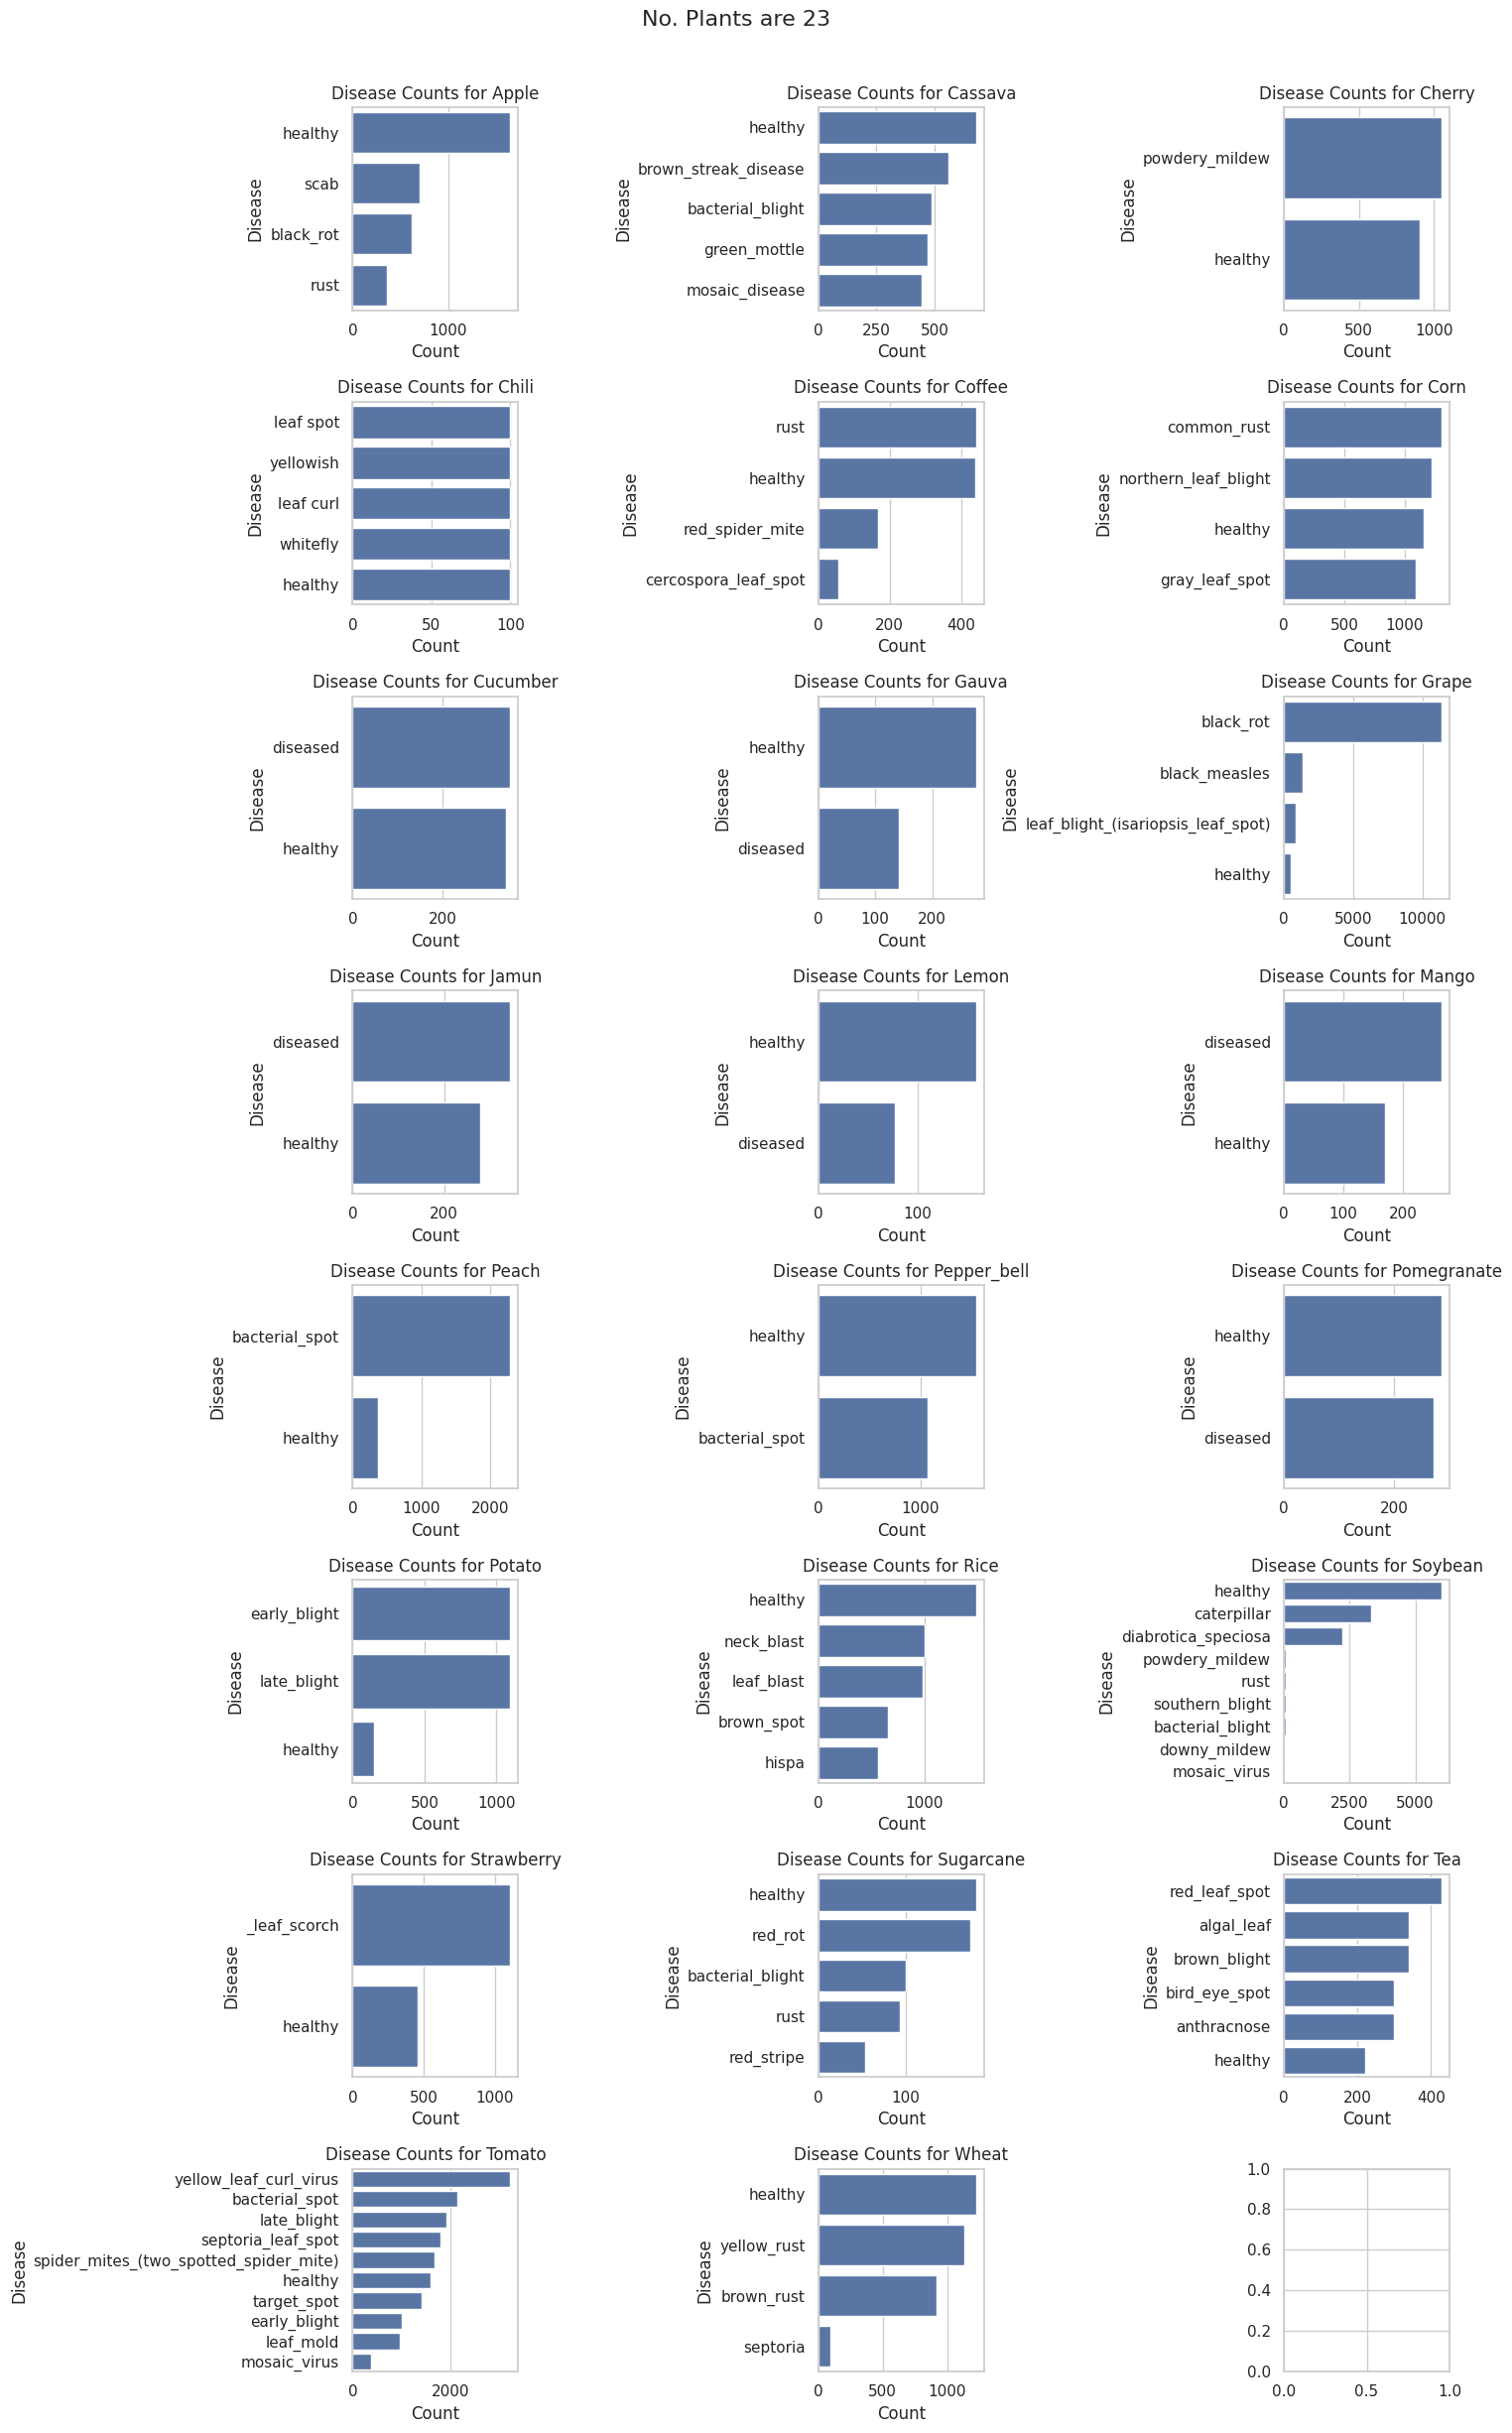

In [77]:
fig, axes = plt.subplots(nrows=(len(set(cls_df['Plant']))//3)+1, ncols= 3, figsize=(15, 25))

fig.suptitle('No. Plants are ' + str(len(set(cls_df['Plant']))) + '\n\n\n', fontsize=16)

# Plot disease counts for each plant
for (plant, data), ax in zip(cls_df.groupby('Plant'), axes.flatten()):
    sns.barplot(x='Count', y='Disease', data=data, ax=ax)
    ax.set_title(f'Disease Counts for {plant}')
    ax.set_xlabel('Count')

# Hide any remaining empty subplots
for ax in axes.flatten()[len(cls_df['Plant']):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

In [99]:
plt_dis = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items = get_image_files,
                 splitter = RandomSplitter(seed = 42),
                 get_y = parent_label,
                 item_tfms = Resize(460),
                 batch_tfms = aug_transforms(size = 224, min_scale = 0.75))

In [100]:
dls = plt_dis.dataloaders(path)

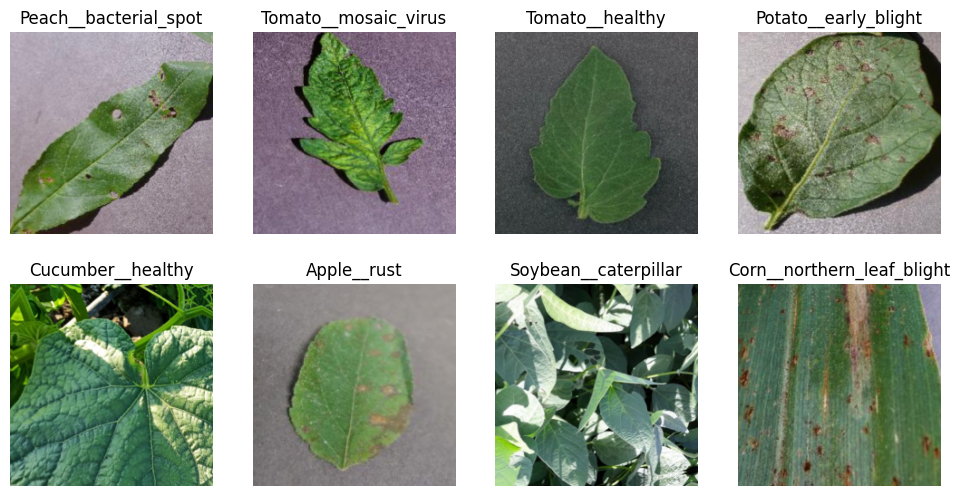

In [108]:
dls.show_batch(nrows = 2, ncols = 4)